In [5]:
# !pip3.9 install us

In [2]:
import requests
import asyncio
import json

import aiohttp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid", rc={"figure.figsize": (8, 6), "axes.titlesize": 15})

In [3]:
# For local ssl certification issue
import ssl

ssl_context=ssl.create_default_context()
ssl_context.check_hostname=False
ssl_context.verify_mode=ssl.CERT_NONE

In [4]:
CENSUS_DATA_API = 'INSERT CENSUS API Here'
tract = '1089002501'
year = '2022'
base_url = f"https://api.census.gov/data/{year}/acs/acs5"

In [13]:
census_tract = "1097003402"
tract_number = census_tract[-6:]
county_code = census_tract[-9:-6]
state_code = census_tract[:-9]
tract_number,county_code,state_code

('003402', '097', '1')

In [1]:
column_name_mapping = {
    'Total Population': 'B01003_001E',
    'Sex Ratio Males': 'B01001_002E',
    'Sex Ratio Females': 'B01001_026E',
    'Median Age': 'B01002_001E',
    'Employed Population 16 and Over': 'B23025_004E',
    'Civilian Labor Force 16 and Over': 'B23025_003E',
    'Poverty Status All People': 'B17001_001E',
    'Below Poverty Level All People': 'B17001_002E',
    'Median Earnings for Workers 16 and Over': 'B20002_001E',
    'Total Housing Units': 'B25001_001E',
    'Occupied Housing Units': 'B25003_001E',
    'Vacant Housing Units': 'B25002_003E',
    'Owner-Occupied Housing Units': 'B25003_002E',
    'Renter-Occupied Housing Units': 'B25003_003E',
    'Median Household Income': 'B19013_001E',
    'Married-Couple Households': 'B11001_003E',
    'Married-Couple Households with Children': 'B11005_004E',
    'Single Parent Households with Children': 'B11005_005E',
    'Single Households': 'B11001_007E',
    'Total Households': 'B11001_001E',
    'Households with a Computer': 'B28010_003E',
    'Households with a Smartphone/Tablet/Portable': 'B28010_005E',
    'Households with Internet': 'B28011_002E',
    'Education Total': 'B15003_001E',
    'No Schooling Completed': 'B15003_002E',
    'Nursery School': 'B15003_003E',
    'Kindergarten': 'B15003_004E',
    '1st Grade': 'B15003_005E',
    '2nd Grade': 'B15003_006E',
    '3rd Grade': 'B15003_007E',
    '4th Grade': 'B15003_008E',
    '5th Grade': 'B15003_009E',
    '6th Grade': 'B15003_010E',
    '7th Grade': 'B15003_011E',
    '8th Grade': 'B15003_012E',
    '9th Grade': 'B15003_013E',
    '10th Grade': 'B15003_014E',
    '11th Grade': 'B15003_015E',
    '12th Grade No Diploma': 'B15003_016E',
    'Regular High School Diploma': 'B15003_017E',
    'GED or Alternative Credential': 'B15003_018E',
    'Some College, Less Than 1 Year': 'B15003_019E',
    'Some College, 1 or More Years, No Degree': 'B15003_020E',
    'Associate’s Degree': 'B15003_021E',
    'Bachelor’s Degree': 'B15003_022E',
    'Master’s Degree': 'B15003_023E',
    'Professional School Degree': 'B15003_024E',
    'Doctorate Degree': 'B15003_025E',
    'Total Occupations': 'C24050_001E',
    'Management, Business, Science, and Arts Occupations': 'C24050_015E',
    'Service Occupations': 'C24050_029E',
    'Sales and Office Occupations': 'C24050_043E',
    'Natural Resources, Construction, and Maintenance Occupations': 'C24050_057E',
    'Production, Transportation, and Material Moving Occupations': 'C24050_071E',
    'Housing Units that use Heating Fuel': 'B25040_001E',
    'Housing Units with Utility Gas': 'B25040_002E',
    'Housing Units with Bottle/Tank/LP Gas': 'B25040_003E',
    'Housing Units with Electricity': 'B25040_004E',
    'Housing Units with Fuel/Oil/Kerosene': 'B25040_005E',
    'Housing Units with Coal': 'B25040_006E',
    'Housing Units with Wood': 'B25040_007E',
    'Housing Units with Solar Energy': 'B25040_008E',
    'Housing Units with Other Fuel': 'B25040_009E',
    'Housing Units with No Fuel Used': 'B25040_010E',  
    'Male Population Under 5 Years': 'B01001_003E',
    'Male Population 5 to 9 Years': 'B01001_004E',
    'Male Population 10 to 14 Years': 'B01001_005E',
    'Male Population 15 to 17 Years': 'B01001_006E',
    'Male Population 18 and 19 Years': 'B01001_007E',
    'Male Population 20 Years': 'B01001_008E',
    'Male Population 21 Years': 'B01001_009E',
    'Male Population 22 to 24 Years': 'B01001_010E',
    'Male Population 25 to 29 Years': 'B01001_011E',
    'Male Population 30 to 34 Years': 'B01001_012E',
    'Male Population 35 to 39 Years': 'B01001_013E',
    'Male Population 40 to 44 Years': 'B01001_014E',
    'Male Population 45 to 49 Years': 'B01001_015E',
    'Male Population 50 to 54 Years': 'B01001_016E',
    'Male Population 55 to 59 Years': 'B01001_017E',
    'Male Population 60 and 61 Years': 'B01001_018E',
    'Male Population 62 to 64 Years': 'B01001_019E',
    'Male Population 65 and 66 Years': 'B01001_020E',
    'Male Population 67 to 69 Years': 'B01001_021E',
    'Male Population 70 to 74 Years': 'B01001_022E',
    'Male Population 75 to 79 Years': 'B01001_023E',
    'Male Population 80 to 84 Years': 'B01001_024E',
    'Male Population 85 Years and Over': 'B01001_025E',
    'Female Population Under 5 Years': 'B01001_027E',
    'Female Population 5 to 9 Years': 'B01001_028E',
    'Female Population 10 to 14 Years': 'B01001_029E',
    'Female Population 15 to 17 Years': 'B01001_030E',
    'Female Population 18 and 19 Years': 'B01001_031E',
    'Female Population 20 Years': 'B01001_032E',
    'Female Population 21 Years': 'B01001_033E',
    'Female Population 22 to 24 Years': 'B01001_034E',
    'Female Population 25 to 29 Years': 'B01001_035E',
    'Female Population 30 to 34 Years': 'B01001_036E',
    'Female Population 35 to 39 Years': 'B01001_037E',
    'Female Population 40 to 44 Years': 'B01001_038E',
    'Female Population 45 to 49 Years': 'B01001_039E',
    'Female Population 50 to 54 Years': 'B01001_040E',
    'Female Population 55 to 59 Years': 'B01001_041E',
    'Female Population 60 and 61 Years': 'B01001_042E',
    'Female Population 62 to 64 Years': 'B01001_043E',
    'Female Population 65 and 66 Years': 'B01001_044E',
    'Female Population 67 to 69 Years': 'B01001_045E',
    'Female Population 70 to 74 Years': 'B01001_046E',
    'Female Population 75 to 79 Years': 'B01001_047E',
    'Female Population 80 to 84 Years': 'B01001_048E',
    'Female Population 85 Years and Over': 'B01001_049E',
    'Total Race Population': 'B02001_001E',
    'Population White Alone': 'B02001_002E',
    'Population Black or African American Alone': 'B02001_003E',
    'Population American Indian and Alaska Native Alone': 'B02001_004E',
    'Population Asian Alone': 'B02001_005E',
    'Population Native Hawaiian and Other Pacific Islander Alone': 'B02001_006E',
    'Population Some Other Race Alone': 'B02001_007E',
    'Population Two or More Races': 'B02001_008E',
    'Population Hispanic or Latino': 'B03001_003E',
}

In [24]:
import requests

data_field = "B01003_001E"  # Total Population
census_tract = "01089002501"
tract_number = census_tract[-6:]
county_code = census_tract[-9:-6]
state_code = census_tract[:-9]
print(tract_number,county_code,state_code)

zip_code = None

# tract_number = "002501"
# county_code = "089"
# state_code = "01"


# Construct the URL for the API endpoint
url = f"https://api.census.gov/data/2022/acs/acs5"
params = {
    'get': data_field, 
    'key': CENSUS_DATA_API
}
if zip_code:
    params['for'] = f'zip code tabulation area:{zip_code}'
elif census_tract:
    if len(census_tract) in [10, 11]:
        tract_number = census_tract[-6:]
        county_code = census_tract[-9:-6]
        state_code = census_tract[:-9]

        params['for'] = f'tract:{tract_number}'
        params['in'] = f'state:{state_code} county:{county_code}'
    else:
        logger.warning("Invalid census tract provided.")
        raise Exception("Invalid census tract provided.")
else:
    logger.warning("Invalid ZIP code or census tract provided.")
    raise Exception("Invalid ZIP code or census tract provided.")

# Make the GET request
response = requests.get(url, params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # The first element is headers, the second is the data
    headers = data[0]
    values = data[1]
    total_population = dict(zip(headers, values))
    print(total_population)
else:
    print("Failed to retrieve data:", response.status_code)


002501 089 01
{'B01003_001E': '2919', 'state': '01', 'county': '089', 'tract': '002501'}


In [26]:
census_tract = '1095030100'
census_tract = census_tract.zfill(10)
census_tract

'1095030100'

In [3]:
# with open('column_names.json', 'w') as f:
#     json.dump(column_name_mapping, f)
# print('Saved as column_names.json')

Saved as column_names.json


In [115]:
reverse_mapping ={}
variables = list(column_name_mapping.values())
reverse_mapping = {v: k for k, v in column_name_mapping.items()}
results = {reverse_mapping[var]: None for var in variables}

# variables
# results

In [116]:
async def fetch_variable_data(session, variable, zip_code):
    params = {
        'get': variable,
        'for': 'zip code tabulation area:{}'.format(zip_code),
        'key': CENSUS_DATA_API
    }
    try:
        async with session.get(base_url, params=params) as response:
            if response.status == 200:
                data = await response.json()
                results[reverse_mapping[variable]] = data[1][0]  # Skip the header
            else:
                results[reverse_mapping[variable]] = f'Status code: {response.status}'
    except asyncio.TimeoutError:
        results[reverse_mapping[variable]] = 'Timeout'
    except Exception as e:
        results[reverse_mapping[variable]] = str(e)

async def run(zip_code):
    async with aiohttp.ClientSession(connector=aiohttp.TCPConnector(ssl=ssl_context)) as session:
        tasks = [fetch_variable_data(session, var, zip_code) for var in variables]
        await asyncio.gather(*tasks)

# Run the async event loop with the ZIP code
# asyncio.run(run(zip_code))
await run(zipcode)

# Now results have the data or error for each variable
results

{'Total Population': '17791',
 'Sex Ratio Males': '8598',
 'Sex Ratio Females': '9193',
 'Median Age': '43.7',
 'Employed Population 16 and Over': '8846',
 'Civilian Labor Force 16 and Over': '9242',
 'Poverty Status All People': '17187',
 'Below Poverty Level All People': '3625',
 'Median Earnings for Workers 16 and Over': '28021',
 'Total Housing Units': '9350',
 'Occupied Housing Units': '6846',
 'Vacant Housing Units': '2504',
 'Owner-Occupied Housing Units': '3262',
 'Renter-Occupied Housing Units': '3584',
 'Median Household Income': '38885',
 'Married-Couple Households': '1548',
 'Married-Couple Households with Children': '466',
 'Single Parent Households with Children': '760',
 'Single Households': '3359',
 'Total Households': '6846',
 'Households with a Computer': '4301',
 'Households with a Smartphone/Tablet/Portable': '5776',
 'Households with Internet': '5070',
 'Education Total': '13798',
 'No Schooling Completed': '396',
 'Nursery School': '0',
 'Kindergarten': '0',
 '1st

In [117]:
len(results)

119

In [118]:
df = pd.DataFrame.from_dict(results, orient='index').transpose()
df.insert(0, 'ZIP Code', zipcode)
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors='coerce')
df

,ZIP Code,Total Population,Sex Ratio Males,Sex Ratio Females,Median Age,Employed Population 16 and Over,Civilian Labor Force 16 and Over,Poverty Status All People,Below Poverty Level All People,Median Earnings for Workers 16 and Over,...,Female Population 85 Years and Over,Total Race Population,Population White Alone,Population Black or African American Alone,Population American Indian and Alaska Native Alone,Population Asian Alone,Population Native Hawaiian and Other Pacific Islander Alone,Population Some Other Race Alone,Population Two or More Races,Population Hispanic or Latino
0,32805,17791,8598,9193,43.7,8846,9242,17187,3625,28021,...,291,17791,3450,12650,33,23,0,473,1162,2534


In [47]:
age_group_mapping = {
    'Under 5 Years': ['Male Population Under 5 Years', 'Female Population Under 5 Years'],
    '5 to 9 Years': ['Male Population 5 to 9 Years', 'Female Population 5 to 9 Years'],
    '10 to 14 Years': ['Male Population 10 to 14 Years', 'Female Population 10 to 14 Years'],
    '15 to 19 Years': ['Male Population 15 to 17 Years', 'Male Population 18 and 19 Years',
                       'Female Population 15 to 17 Years', 'Female Population 18 and 19 Years'],
    '20 to 24 Years': ['Male Population 20 Years', 'Male Population 21 Years', 'Male Population 22 to 24 Years',
                       'Female Population 20 Years', 'Female Population 21 Years', 'Female Population 22 to 24 Years'],
    '25 to 34 Years': ['Male Population 25 to 29 Years', 'Male Population 30 to 34 Years',
                       'Female Population 25 to 29 Years', 'Female Population 30 to 34 Years'],
    '35 to 44 Years': ['Male Population 35 to 39 Years', 'Male Population 40 to 44 Years',
                       'Female Population 35 to 39 Years', 'Female Population 40 to 44 Years'],
    '45 to 54 Years': ['Male Population 45 to 49 Years', 'Male Population 50 to 54 Years',
                       'Female Population 45 to 49 Years', 'Female Population 50 to 54 Years'],
    '55 to 59 Years': ['Male Population 55 to 59 Years', 'Female Population 55 to 59 Years'],
    '60 to 64 Years': ['Male Population 60 and 61 Years', 'Male Population 62 to 64 Years',
                       'Female Population 60 and 61 Years', 'Female Population 62 to 64 Years'],
    '65 to 74 Years': ['Male Population 65 and 66 Years', 'Male Population 67 to 69 Years', 'Male Population 70 to 74 Years',
                       'Female Population 65 and 66 Years', 'Female Population 67 to 69 Years', 'Female Population 70 to 74 Years'],
    '75 to 84 Years': ['Male Population 75 to 79 Years', 'Male Population 80 to 84 Years',
                       'Female Population 75 to 79 Years', 'Female Population 80 to 84 Years'],
    '85 Years and Over': ['Male Population 85 Years and Over', 'Female Population 85 Years and Over']
}
age_group_df = pd.DataFrame()

# Sum the columns for each age group
for group_name, columns in age_group_mapping.items():
    age_group_df[group_name] = df[columns].sum(axis=1)
    
age_group_df = age_group_df.apply(pd.to_numeric, errors='coerce')
age_group_df.insert(0, 'ZIP Code', zipcode)
age_group_df

,ZIP Code,Under 5 Years,5 to 9 Years,10 to 14 Years,15 to 19 Years,20 to 24 Years,25 to 34 Years,35 to 44 Years,45 to 54 Years,55 to 59 Years,60 to 64 Years,65 to 74 Years,75 to 84 Years,85 Years and Over
0,32805,832,565,810,856,930,2680,2422,2299,1673,1220,2042,914,548


In [48]:
# Define the education groupings
education_grouping = {
    'Less Than 9th Grade': [
        'No Schooling Completed', 'Nursery School', 'Kindergarten', '1st Grade', 
        '2nd Grade', '3rd Grade', '4th Grade'
    ],
    '9th to 12th Grade No Diploma': [
        '5th Grade', '6th Grade', '7th Grade', '8th Grade', '9th Grade', '10th Grade', 
        '11th Grade', '12th Grade No Diploma'
    ],
    'High School Graduate and Equivalent': [
        'Regular High School Diploma', 'GED or Alternative Credential'
    ],
    'Some College No Degree': [
        'Some College, Less Than 1 Year', 'Some College, 1 or More Years, No Degree'
    ],
    'Associates Degree': [
        'Associate’s Degree'
    ],
    'Bachelors Degree': [
        'Bachelor’s Degree'
    ],
    'Graduate or Professional Degree': [
        'Master’s Degree', 'Professional School Degree', 'Doctorate Degree'
    ]
}
edu_group_df = pd.DataFrame()

# Sum the columns for each education group
for group_name, columns in education_grouping.items():
    edu_group_df[group_name] = df[columns].sum(axis=1)

edu_group_df = edu_group_df.apply(pd.to_numeric, errors='coerce')
edu_group_df.insert(0, 'ZIP Code', zipcode)
edu_group_df

,ZIP Code,Less Than 9th Grade,9th to 12th Grade No Diploma,High School Graduate and Equivalent,Some College No Degree,Associates Degree,Bachelors Degree,Graduate or Professional Degree
0,32805,490,2356,5271,2368,835,1675,803


In [86]:
race_columns = [
    'Population White Alone',
    'Population Black or African American Alone',
    'Population American Indian and Alaska Native Alone',
    'Population Asian Alone',
    'Population Native Hawaiian and Other Pacific Islander Alone',
    'Population Some Other Race Alone',
    'Population Two or More Races',
#     'Population Hispanic or Latino'
]
occupation_columns = [
#     'Total Occupations', 
    'Management, Business, Science, and Arts Occupations', 
    'Service Occupations', 
    'Sales and Office Occupations', 
    'Natural Resources, Construction, and Maintenance Occupations', 
    'Production, Transportation, and Material Moving Occupations'
]
heating_fuel_columns = [    
#      'Housing Units that use Heating Fuel',
     'Housing Units with Utility Gas',
     'Housing Units with Bottle/Tank/LP Gas',
     'Housing Units with Electricity',
     'Housing Units with Fuel/Oil/Kerosene',
     'Housing Units with Coal',
     'Housing Units with Wood',
     'Housing Units with Solar Energy',
     'Housing Units with Other Fuel',
     'Housing Units with No Fuel Used',
]

-----------------Analysis for ZIP Code: 32805------------------- 

--------------------Demographic Analysis------------------------ 

Total Population: 17791
Sex Ratio (Males per 100 Females): 93.5%


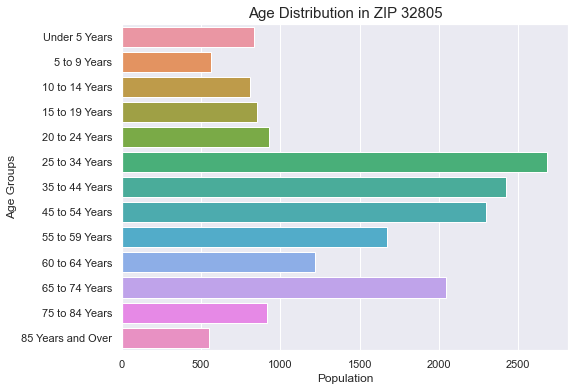

Top 5 age groups are: 

25 to 34 Years: 2680
35 to 44 Years: 2422
45 to 54 Years: 2299
65 to 74 Years: 2042
55 to 59 Years: 1673

The median age is 43.7.



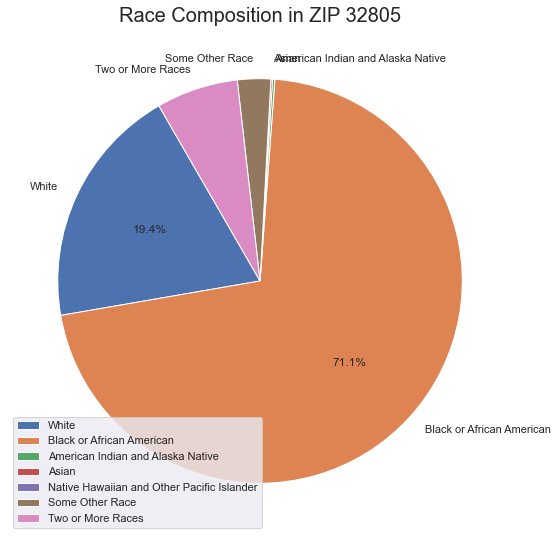

The percentage of Hispanic or Latino population is 14.24%.
"Hispanic or Latino" is considered an ethnicity, not a race, by the Census Bureau, and individuals who identify as Hispanic or Latino can be of any race.

The majority race is Black or African American.



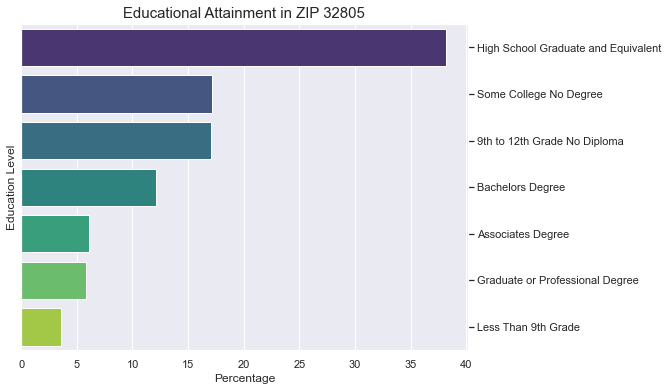

The majority of the population (ages 25 and above) have the education level High School Graduate and Equivalent with 38.2%.

Employment Rate: 95.72% (8846/9242)
Poverty Rate (in last 12 months): 21.1%
Median Income for a worker: $28021


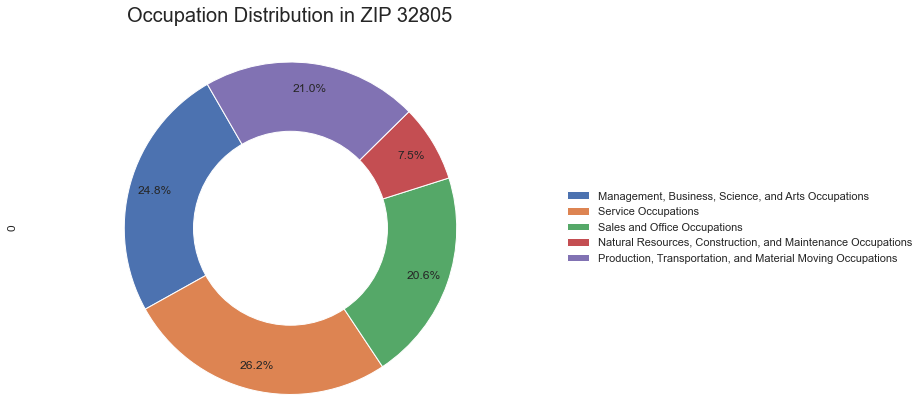

------------------------------------------------------------ 

--------------------Housing Analysis------------------------ 

Total Housing Units: 9350
Occupied/Vacant Housing Units: 6846/2504
Median Household Income: $38885


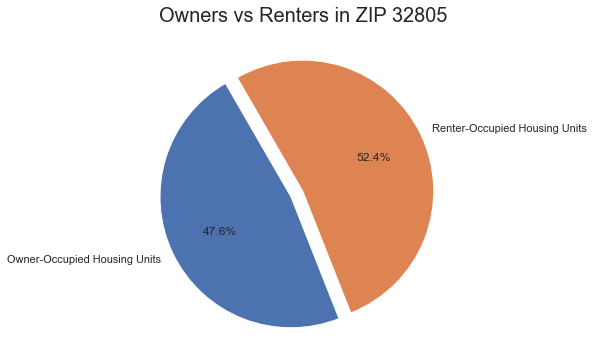

Majority of the housing units are Renter-Occupied Housing Units


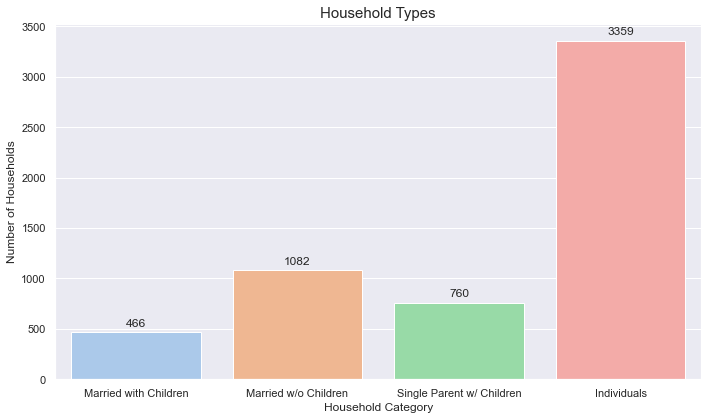

     Energy Source Percentage  Number of Units
       Electricity     93.57%             6406
       Utility Gas      2.70%              185
      No Fuel Used      1.80%              123
Bottle/Tank/LP Gas      0.72%               49
        Other Fuel      0.60%               41
      Solar Energy      0.47%               32
 Fuel/Oil/Kerosene      0.15%               10
              Coal      0.00%                0
              Wood      0.00%                0


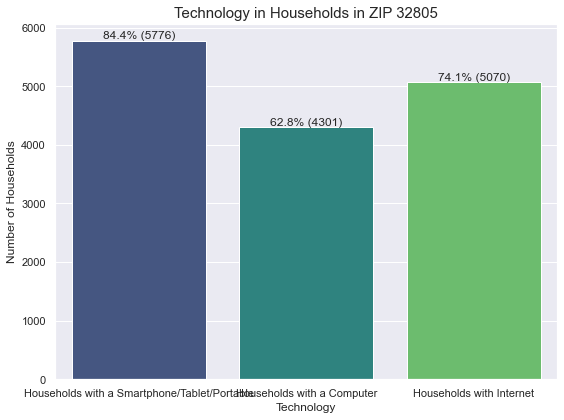

Percentage is based on the total occupied households 6846.
------------------------------------------------------------ 



In [123]:
for zip_code in df['ZIP Code'].unique():
    print(f"\033[1m-----------------Analysis for ZIP Code: {zip_code}-------------------\033[0m \n")
    print("\033[1m--------------------Demographic Analysis------------------------\033[0m \n")
    df_zip = df[df['ZIP Code'] == zip_code]
    
    # Sex
    total_population = df_zip['Total Population'].iloc[0]
    sex_ratio = round(df_zip['Sex Ratio Males'].iloc[0] / df_zip['Sex Ratio Females'].iloc[0] * 100,1)
    print(f"Total Population: \033[1m{total_population}\033[0m")
    print(f"Sex Ratio (Males per 100 Females): \033[1m{sex_ratio}%\033[0m")
    
    # Age
    age_distribution = age_group_df[age_group_df['ZIP Code'] == zip_code].iloc[0]
    age_distribution = age_distribution.drop('ZIP Code').astype(int)
    top_5_ages = age_distribution.nlargest(5)
    median_age = df_zip['Median Age'].iloc[0]
    
    sns.barplot(x=age_distribution.values, y=age_distribution.index)
    plt.title(f'Age Distribution in ZIP {zip_code}')
    plt.xlabel('Population')
    plt.ylabel('Age Groups')
    plt.show()
    print(f"Top 5 age groups are: \n")
    for age_group, population in top_5_ages.items():
        print(f"\033[1m{age_group}\033[0m: {population}")
    print(f"\nThe median age is \033[1m{median_age}\033[0m.\n")

    # Race
    race_distribution = df_zip[race_columns].iloc[0]
    race_distribution.index = [col.replace('Population ', '').replace(' Alone', '') for col in race_distribution.index]
    top_race = race_distribution.idxmax()
    hispanic_latino_percent = (df_zip['Population Hispanic or Latino'].iloc[0] / total_population) * 100

    race_distribution.plot(kind='pie',
                           autopct=lambda p: '{:.1f}%'.format(p) if p > 10 else '',  
                           legend=True,
                           figsize=(8,8),
                           startangle=120)
    plt.title(f'Race Composition in ZIP {zip_code}', fontsize=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    print(f"The percentage of Hispanic or Latino population is \033[1m{hispanic_latino_percent:.2f}%\033[0m.\n\"Hispanic or Latino\" is considered an ethnicity, not a race, by the Census Bureau, and individuals who identify as Hispanic or Latino can be of any race.\n")
    print(f"The majority race is \033[1m{top_race}\033[0m.\n")
    
    # Education
    edu_data = edu_group_df[edu_group_df['ZIP Code'] == zip_code].iloc[0]
    edu_data = edu_data.drop('ZIP Code').astype(int).sort_values(ascending=False)
    edu_percentage = edu_data.divide(df_zip['Education Total'].iloc[0]) * 100
    top_edu = edu_percentage.idxmax()  

    fig, ax = plt.subplots()
    sns.barplot(x=edu_percentage.values, y=edu_percentage.index, palette="viridis", ax=ax)
    plt.title(f'Educational Attainment in ZIP {zip_code}')
    plt.xlabel('Percentage')
    plt.ylabel('Education Level')
    ax.yaxis.tick_right()
    plt.show()
    print(f"The majority of the population (ages 25 and above) have the education level \033[1m{top_edu}\033[0m with \033[1m{round(edu_percentage.max(),1)}%\033[0m.\n")
    
    # Employment
    employed_population = df_zip['Employed Population 16 and Over'].iloc[0]
    civilian_labor_force = df_zip['Civilian Labor Force 16 and Over'].iloc[0]
    employment_rate = (employed_population / civilian_labor_force) * 100
    print(f"Employment Rate: \033[1m{employment_rate:.2f}%\033[0m ({employed_population}/{civilian_labor_force})")
    
    poverty_people = df_zip['Poverty Status All People'].iloc[0]
    poverty_below = df_zip['Below Poverty Level All People'].iloc[0]
    poverty_rate = round((poverty_below / poverty_people) * 100, 1)
    print(f"Poverty Rate (in last 12 months): \033[1m{poverty_rate}%\033[0m")
    
    median_household_income = df_zip['Median Earnings for Workers 16 and Over'].iloc[0]
    print(f"Median Income for a worker: \033[1m${median_household_income}\033[0m")
    
        
    occupation_distribution = df_zip[occupation_columns].iloc[0]
    total_occupations = df_zip['Total Occupations']
    
    occupation_distribution.plot(kind='pie', 
                                 autopct='%1.1f%%', 
                                 startangle=120, 
                                 labels=None,
                                 legend=True,
                                 pctdistance=0.85, 
                                 radius=1.2)
    plt.title(f'Occupation Distribution in ZIP {zip_code}', pad=20, fontsize=20)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.axis('equal') 
    plt.tight_layout()
    plt.legend(labels=occupation_distribution.index, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.show()
    
    
    
    print("\033[1m------------------------------------------------------------\033[0m \n")
    print("\033[1m--------------------Housing Analysis------------------------\033[0m \n")
    
    total_units = df_zip['Total Housing Units'].iloc[0]
    occupied_units = df_zip['Occupied Housing Units'].iloc[0]
    vacant_units = df_zip['Vacant Housing Units'].iloc[0]
    median_household_income = df_zip['Median Household Income'].iloc[0]
    print(f"Total Housing Units: \033[1m{total_units}\033[0m")
    print(f"Occupied/Vacant Housing Units: \033[1m{occupied_units}/{vacant_units}\033[0m")
    print(f"Median Household Income: \033[1m${median_household_income}\033[0m")
    

    
    occupied_type = df_zip[['Owner-Occupied Housing Units','Renter-Occupied Housing Units']].iloc[0]
    occupied_type.plot(kind='pie',
                        explode=(0.1, 0),
                        autopct='%1.1f%%', 
                        figsize=(8,8),
                        startangle=120,
                        colors=sns.color_palette("deep"))
    plt.title(f'Owners vs Renters in ZIP {zip_code}', fontsize=20)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    print(f"Majority of the housing units are \033[1m{occupied_type.idxmax()}\033[0m")
    

    # Households type
    df_zip['Married Households Without Children'] = df_zip['Married-Couple Households'] - df_zip['Married-Couple Households with Children']
    household_data = {
        'Family Type': ['Married with Children', 'Married w/o Children', 'Single Parent w/ Children', 'Individuals'],
        'Count': [
            df_zip['Married-Couple Households with Children'].sum(),
            df_zip['Married Households Without Children'].sum(),
            df_zip['Single Parent Households with Children'].sum(),
            df_zip['Single Households'].sum()
        ]
    }
    household_df = pd.DataFrame(household_data)
    
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(
        x='Family Type', 
        y='Count', 
        data=household_df, 
        palette='pastel'
    )
    for p in barplot.patches:
        barplot.annotate(
            format(p.get_height(), '.0f'), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 9), 
            textcoords = 'offset points'
        )

    plt.title('Household Types')
    plt.xlabel('Household Category')
    plt.ylabel('Number of Households')
    plt.tight_layout()
    plt.show()
    
    sustainability_data = df_zip[heating_fuel_columns].iloc[0].sort_values(ascending=False)
    sustainability_features = (sustainability_data / df_zip['Housing Units that use Heating Fuel'].iloc[0]) * 100
    sustainability_features.index = [col.replace('Housing Units with ', '') for col in sustainability_features.index]

    sustainability_table = pd.DataFrame({
        'Energy Source': sustainability_features.index,
        'Percentage': sustainability_features.values,
        'Number of Units': sustainability_data.values
    }).sort_values(by='Percentage', ascending=False)
    
    sustainability_table['Percentage'] = sustainability_table.apply(
        lambda row: f"{row['Percentage']:.2f}%", axis=1)
    sustainability_table.reset_index(drop=True, inplace=True)
    print(sustainability_table.to_string(index=False))

    # Computer and internet
    household_tech_data = df_zip[['Households with a Smartphone/Tablet/Portable', 'Households with a Computer', 'Households with Internet']].iloc[0]
    household_tech_percentages = (household_tech_data / occupied_units) * 100
    sns.barplot(x=household_tech_data.index, y=household_tech_data.values, palette="viridis")
    plt.title(f'Technology in Households in ZIP {zip_code}')
    plt.xlabel('Technology')
    plt.ylabel('Number of Households')

    for index, value in enumerate(household_tech_data.values):
        percentage = household_tech_percentages[index]
        plt.text(index, value, f'{percentage:.1f}% ({value})', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
    print(f'Percentage is based on the total occupied households \033[1m{occupied_units}\033[0m.')
    
    print("\033[1m------------------------------------------------------------\033[0m \n")

In [121]:
# variables = ['B28011_001E', 'B28010_001E']

# params = {
#     'get': ','.join(variables),
#     'for': 'zip code tabulation area:{}'.format(zip_code),
#     'key': CENSUS_DATA_API
# }

# response = requests.get(base_url, params=params)
# if response.status_code == 200:
#     # Parse the response JSON
#     data = response.json()
#     print(data[1:])
# else:
#     print("Failed to retrieve data: ", response.status_code)